In [1]:
from tensorflow import keras
from imutils import paths
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD 
import numpy as np
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Model


In [2]:
width, height = 128, 128

In [3]:
Densebase = DenseNet121(include_top=False, input_shape=(
    width, height, 3), weights='imagenet', classes=2)

x = Densebase.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=Densebase.input,
              outputs=predictions)

model.summary()

_relu[0][0]        
__________________________________________________________________________________________________
conv5_block4_1_bn (BatchNormali (None, 4, 4, 128)    512         conv5_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block4_1_relu (Activation (None, 4, 4, 128)    0           conv5_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block4_2_conv (Conv2D)    (None, 4, 4, 32)     36864       conv5_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block4_concat (Concatenat (None, 4, 4, 640)    0           conv5_block3_concat[0][0]        
                                                                 conv5_block4_2_conv[0][0]        
_________________________________________________________________________________________

In [4]:
# initialize the number of training epochs and batch size
NUM_EPOCHS = 50
BS = 32
TRAIN_PATH = '../dados/'
# determine the total number of image paths in training, validation,
# and testing directories
totalTrain = len(list(paths.list_images(TRAIN_PATH)))

In [5]:
# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    validation_split=0.1)

In [6]:

# initialize the testing data augmentation object
testAug = ImageDataGenerator(rescale=1 / 255.0, validation_split=0.1)

In [7]:
# initialize the training generator
trainGen = trainAug.flow_from_directory(
    TRAIN_PATH,
    class_mode="categorical",
    target_size=(height, width),
    color_mode="rgb",
    shuffle=True,
    seed=123,
    batch_size=BS,
    subset='training')

Found 3200 images belonging to 2 classes.


In [8]:
# initialize the testing generator
testGen = testAug.flow_from_directory(
    TRAIN_PATH,
    class_mode="categorical",
    target_size=(height, width),
    color_mode="rgb",
    shuffle=False,
    batch_size=BS,
    subset='validation')

Found 355 images belonging to 2 classes.


In [9]:
opt = SGD(lr=1e-1, momentum=0.9, decay=1e-1 / NUM_EPOCHS)
model.compile(loss="binary_crossentropy", 
              optimizer=opt,
              metrics=["accuracy", 
                        keras.metrics.AUC(),
                        keras.metrics.Precision(),
                        keras.metrics.Recall()])

In [10]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# train our Keras model
H = model.fit(
    trainGen,
    validation_data=testGen,
    epochs=NUM_EPOCHS)

Epoch 1/50
100/100 [==============================] - 312s 3s/step - loss: 0.2858 - accuracy: 0.9181 - auc: 0.9607 - precision: 0.9157 - recall: 0.9134 - val_loss: 76.0757 - val_accuracy: 0.4704 - val_auc: 0.4703 - val_precision: 0.4704 - val_recall: 0.4704
Epoch 2/50
100/100 [==============================] - 315s 3s/step - loss: 0.1600 - accuracy: 0.9453 - auc: 0.9842 - precision: 0.9430 - recall: 0.9463 - val_loss: 7.3658 - val_accuracy: 0.5352 - val_auc: 0.5729 - val_precision: 0.5352 - val_recall: 0.5352
Epoch 3/50
100/100 [==============================] - 314s 3s/step - loss: 0.1178 - accuracy: 0.9575 - auc: 0.9907 - precision: 0.9581 - recall: 0.9581 - val_loss: 0.2914 - val_accuracy: 0.8901 - val_auc: 0.9649 - val_precision: 0.8904 - val_recall: 0.8930
Epoch 4/50
100/100 [==============================] - 309s 3s/step - loss: 0.1227 - accuracy: 0.9588 - auc: 0.9898 - precision: 0.9588 - recall: 0.9588 - val_loss: 1.1698 - val_accuracy: 0.5859 - val_auc: 0.7714 - val_precision:

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])

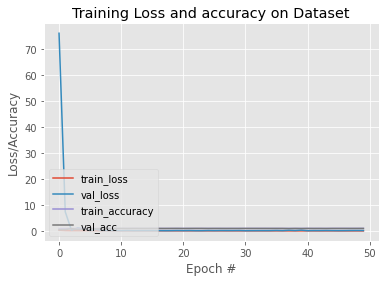

In [11]:
import matplotlib.pyplot as plt

N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")

plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('Training Loss and accuracy on Dataset')
H.history.keys()

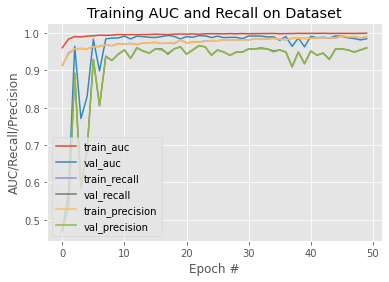

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["auc"], label="train_auc")
plt.plot(np.arange(0, N), H.history["val_auc"], label="val_auc")
plt.plot(np.arange(0, N), H.history["recall"], label="train_recall")
plt.plot(np.arange(0, N), H.history["val_recall"], label="val_recall")
plt.plot(np.arange(0, N), H.history["precision"], label="train_precision")
plt.plot(np.arange(0, N), H.history["val_precision"], label="val_precision")

plt.title("Training AUC and Recall on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("AUC/Recall/Precision")
plt.legend(loc="lower left")
plt.savefig('Training AUC, Recall and Precision on Dataset')

                    precision    recall  f1-score   support

rx-alterado-anonim       0.98      0.94      0.96       167
  rx-normal-anonim       0.95      0.98      0.96       188

          accuracy                           0.96       355
         macro avg       0.96      0.96      0.96       355
      weighted avg       0.96      0.96      0.96       355



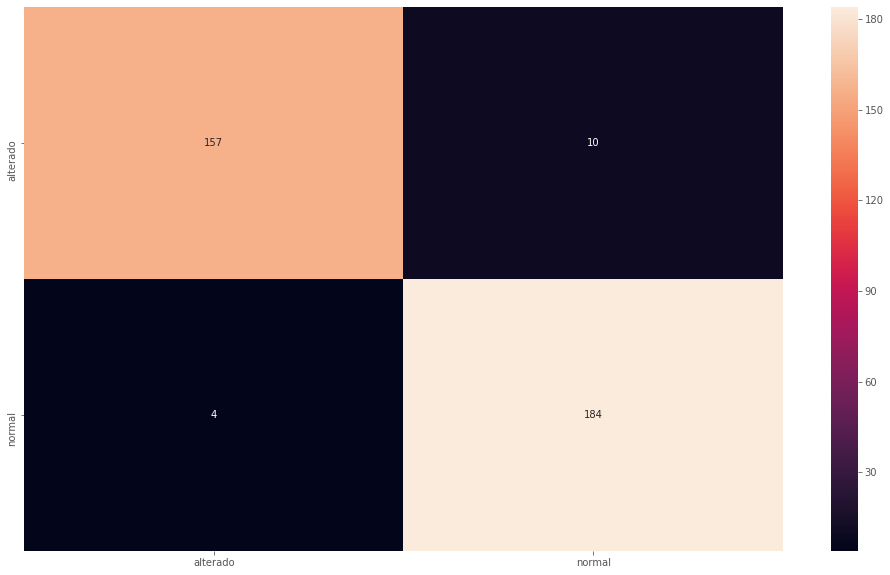

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

testGen.reset()
predIdxs = model.predict(testGen, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


conf_mat = confusion_matrix(testGen.classes, predIdxs)

class_names = ['alterado', 'normal']
fig = plt.figure(figsize=(17,10))
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')
heatmap

# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
                            target_names=testGen.class_indices.keys()))


In [14]:
model.save('Models/DenseNet121_H{}W{}.h5'.format(height, width))